In [96]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

Data Descrition:
1. <strong>age</strong>: age in years
2. <strong>sex</strong>: sex (1 = male; 0 = female)
3. <strong>cp</strong>: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. <strong>trestbps</strong>: resting blood pressure (in mm Hg on admission to the hospital)
5. <strong>chol</strong>: serum cholestoral in mg/dl
6. <strong>fbs</strong>: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. <strong>restecg</strong>: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. <strong>thalach</strong>: maximum heart rate achieved
9. <strong>exang</strong>: exercise induced angina (1 = yes; 0 = no)
10. <strong>oldpeak</strong> = ST depression induced by exercise relative to rest
11. <strong>slope</strong>: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. <strong>ca</strong>: number of major vessels (0-3) colored by flourosopy
13. <strong>thal</strong>: 0 = normal; 1 = fixed defect; 2 = reversable defect


<strong>condition</strong>: 0 = no disease, 1 = disease


In [15]:
df = pd.read_csv('../data/raw/heart_cleveland_upload.csv')

## Общая информация о датасете

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [92]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [94]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Попарные распределения

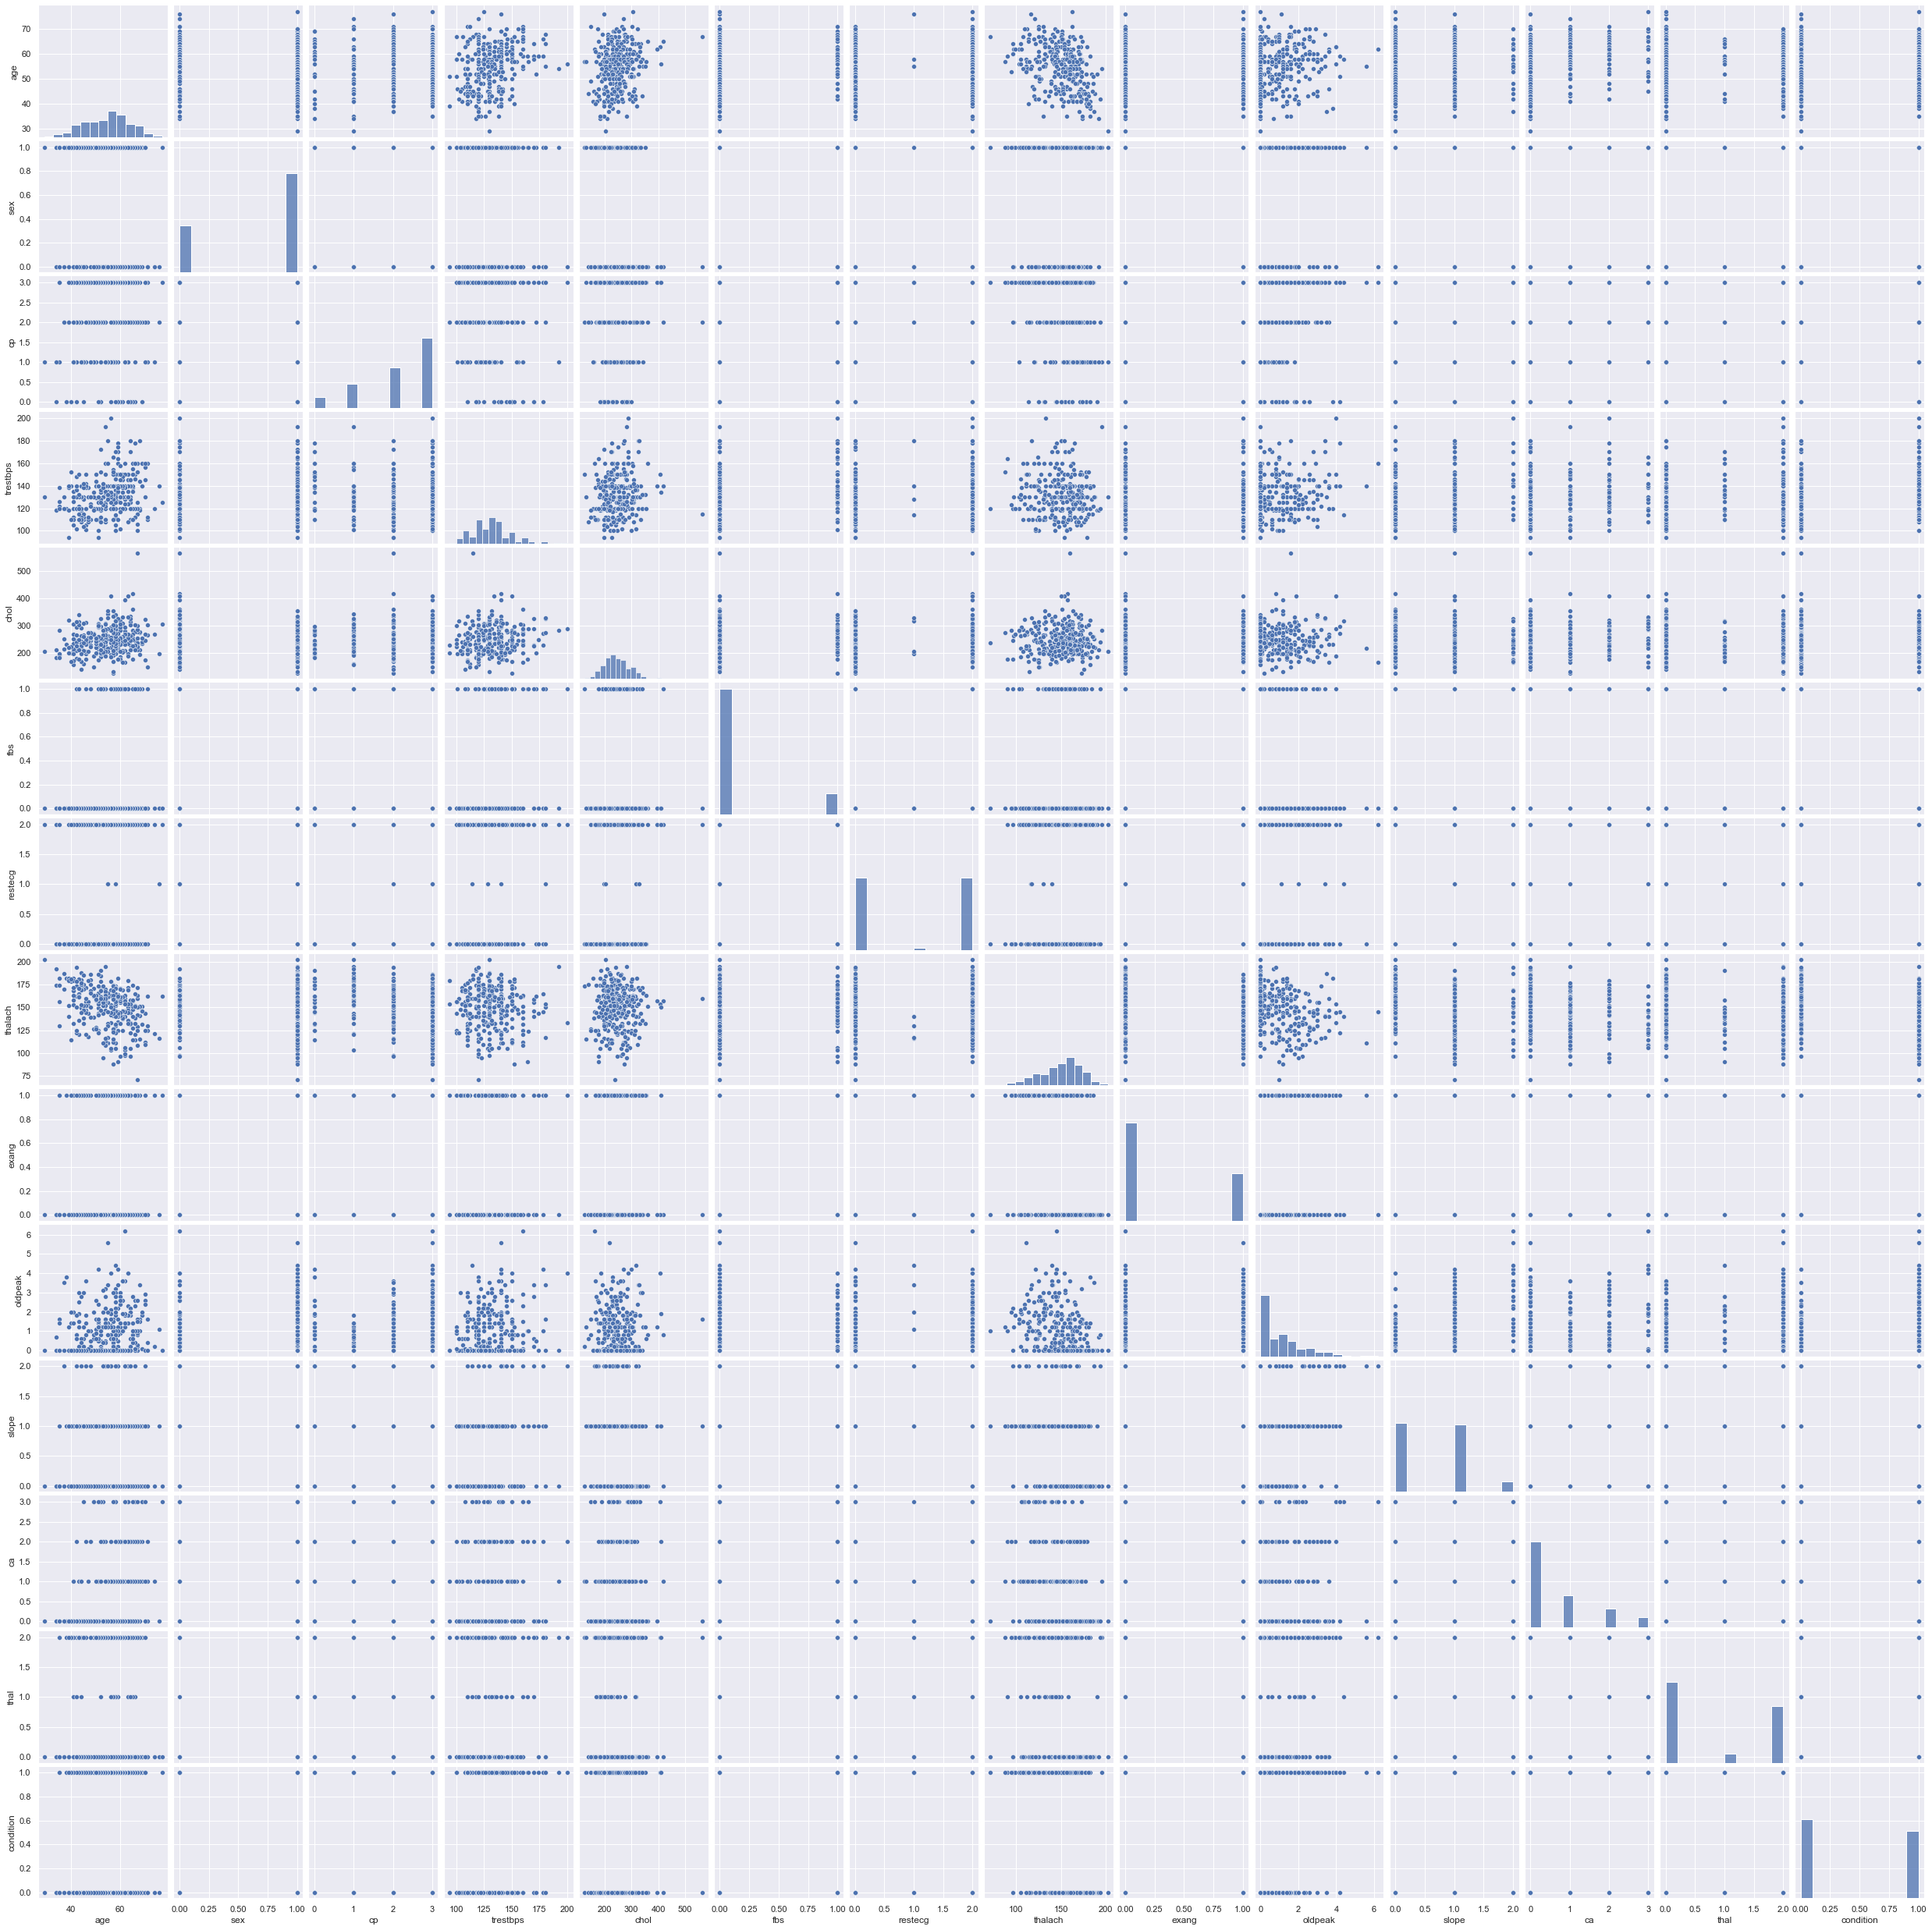

In [95]:
sns.pairplot(df)

## Распределения отдельных признаков

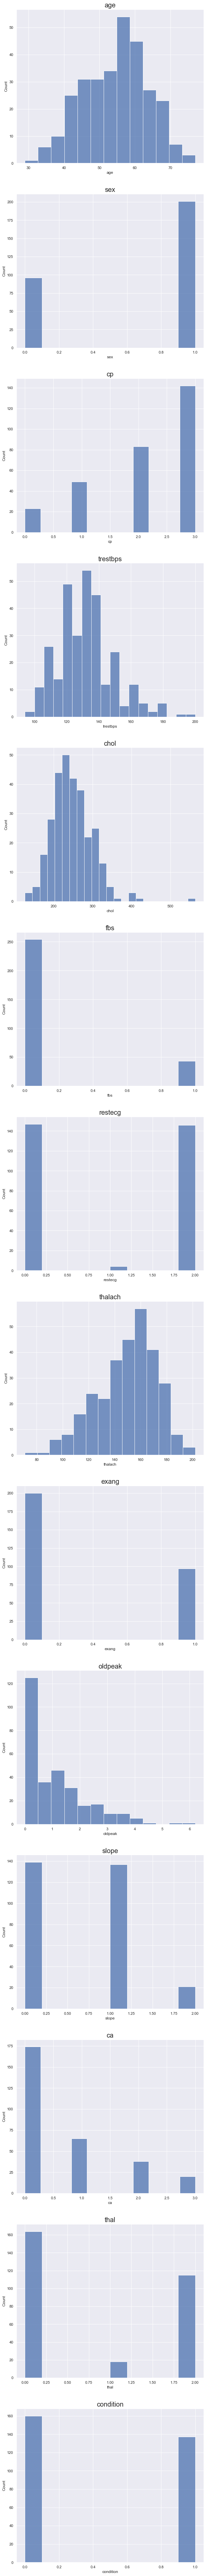

In [107]:
nrows=len(df.columns)
n_cols = 1

fig, axes = plt.subplots(nrows, n_cols, figsize=(10, 10 * nrows))
col_num = 0
for column in df.columns:
    axes[col_num].set_title(column, fontsize=20)
    sns.histplot(df[column],ax=axes[col_num])
    col_num += 1



## Распределение таргета

In [29]:
df_condition = df.groupby('condition').size()

In [60]:
fig = px.bar(data_frame=df_condition, x=df_condition.index, y=df_condition.values,  color=df_condition.index, barmode="group", 
       labels={'x': 'condition', 'y': 'counts'},
       title='Target distribution')

fig.update_coloraxes(showscale=False)
fig.show()

## Распределение таргета в зависимости от возраста

In [21]:
df_age = df.groupby('age').count()

In [108]:
px.bar(df_age, x=df_age.index, y='condition', title='Dependency of target over age')

## Соотношение полов

In [85]:
df_sex = df.groupby('sex').size()
df_sex

sex
0     96
1    201
dtype: int64

In [89]:
fig = px.pie(df_sex, values=df_sex.values, names=['male', 'female'],  color=df_condition.index, title='Sex distribution')
fig.show()

## Соотношение заболевших и здоровых в зависимости от пола

In [64]:
df_condition_by_sex = df.groupby(['condition', 'sex']).size()

In [74]:
fig = px.pie(df_condition_by_sex, values=df_condition_by_sex.values, 
             names=['female healthy', 'male healthy', 'female with disease', 'male with disease'])
fig.show()

## Скоррелированность признаков

In [122]:
px.imshow(df.corr(), text_auto=True, width=1000, height=1000)